<a href="https://colab.research.google.com/github/vinnimichelin/Regressao_Linear_Marketing/blob/main/Regressao_Linear_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
ds = pd.read_csv("MKT.csv", sep=',')
ds.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


# **Análise Descritiva**

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [4]:
ds.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


# **Análise Exploratória**


In [28]:
#Inserindo a coluna de Total Gasto, para facilitar a visualização. A mesma soma o valor de todas as 3 plataformas.

ds.insert(3,'total_gasto',ds["youtube"] + ds['facebook'] + ds['newspaper'])

In [45]:
ds.describe()

,youtube,facebook,newspaper,total_gasto,sales
count,171.000000,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,240.932632,16.922807
std,102.449597,17.913532,24.902918,112.167551,6.314608
min,0.840000,0.000000,0.360000,25.680000,1.920000
25%,91.080000,11.700000,13.740000,146.820000,12.540000
50%,179.760000,26.760000,31.080000,248.400000,15.480000
75%,262.980000,43.680000,50.880000,337.740000,20.820000
max,355.680000,59.520000,121.080000,520.320000,32.400000


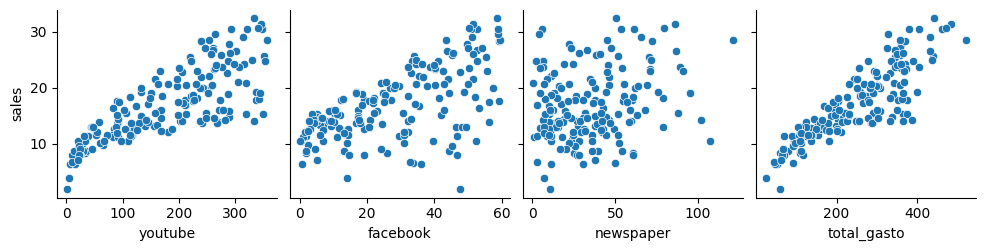

In [88]:
sns.pairplot(ds, x_vars=['youtube', 'facebook', 'newspaper','total_gasto'], y_vars='sales')

[Text(0.5, 0, 'Valor de Vendas'),
 Text(0, 0.5, 'Valor Total Gasto em Publicidade')]

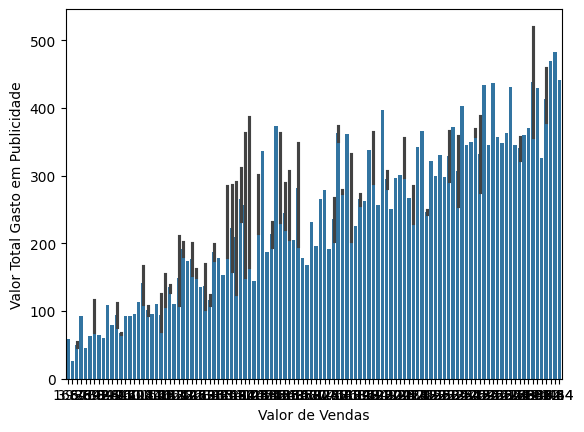

In [67]:
g1 = sns.barplot(data = ds, x='sales', y='total_gasto')
g1.set(xlabel = 'Valor de Vendas', ylabel = 'Valor Total Gasto em Publicidade')

[Text(0.5, 0, 'Investimento Facebook'), Text(0, 0.5, 'Vendas')]

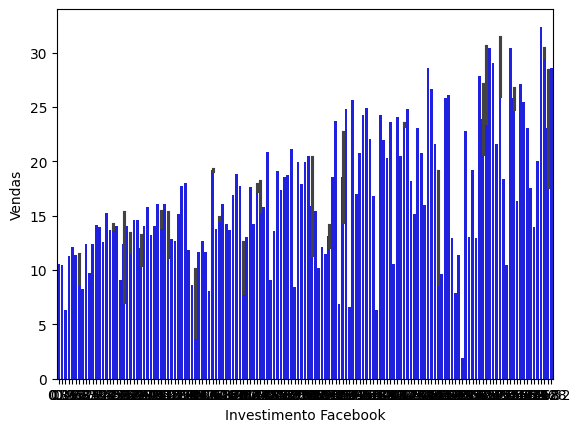

In [60]:
g2 = sns.barplot(data = ds, x='facebook', y='sales', color ='blue')
g2.set(xlabel = 'Investimento Facebook', ylabel = 'Vendas')

[Text(0.5, 0, 'Investimento Youtube'), Text(0, 0.5, 'Vendas')]

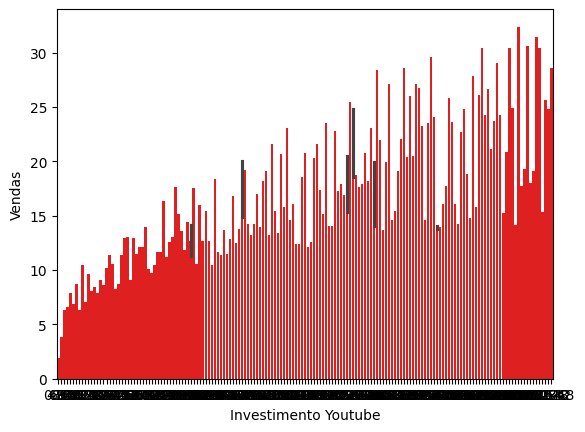

In [61]:
g3 = sns.barplot(data = ds, x='youtube', y='sales', color ='red')
g3.set(xlabel = 'Investimento Youtube', ylabel = 'Vendas')

[Text(0.5, 0, 'Investimento Newspaper'), Text(0, 0.5, 'Vendas')]

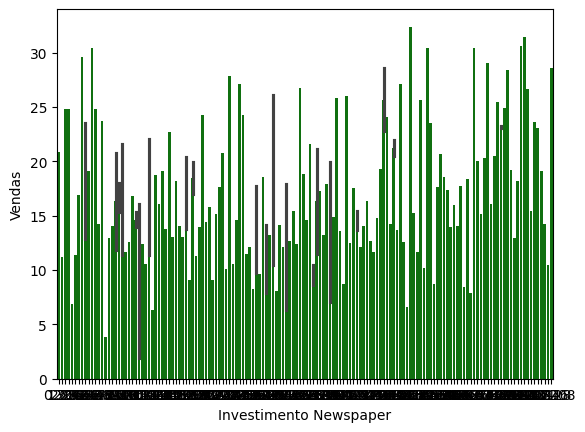

In [71]:
g4 = sns.barplot(data = ds, x='newspaper', y='sales', color ='green')
g4.set(xlabel = 'Investimento Newspaper', ylabel = 'Vendas')

<Axes: >

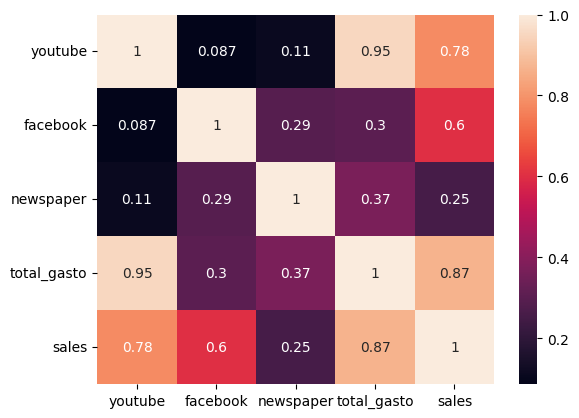

In [87]:
#O gráfico de correlações mostra visualmente o quanto um dado se relaciona com o outro. Quanto maior o número (max=1 min=0), maior a relação.

sns.heatmap(ds.corr(), annot=True)

**Mediante a estas análises, podemos chegar a conclusão clara de que quanto mais investimos em publicidade, maior é o nosso retorno de vendas. Porém, longe de termos algum tipo de lucro em cima desse processo, já que estamos gastando muito mais na publicidade do produto do que estamos vendendo o mesmo.
O Youtube tem a maior correlação com os resultados justamente por ser a plataforma que tem mais investimento.**

# **Modelagem**

In [121]:
X = ds[['youtube','facebook','newspaper']]

y = ds[['sales']]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7 , random_state=42)

In [123]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [124]:
ln = LinearRegression()

ln.fit(X_train, y_train)

LinearRegression()

In [125]:
y_pred = ln.predict(X_test)

In [138]:
r = r2_score(y_test, y_pred)

print('Porcentagem R2 Score:',r)

Porcentagem R2 Score: 0.882423505618885


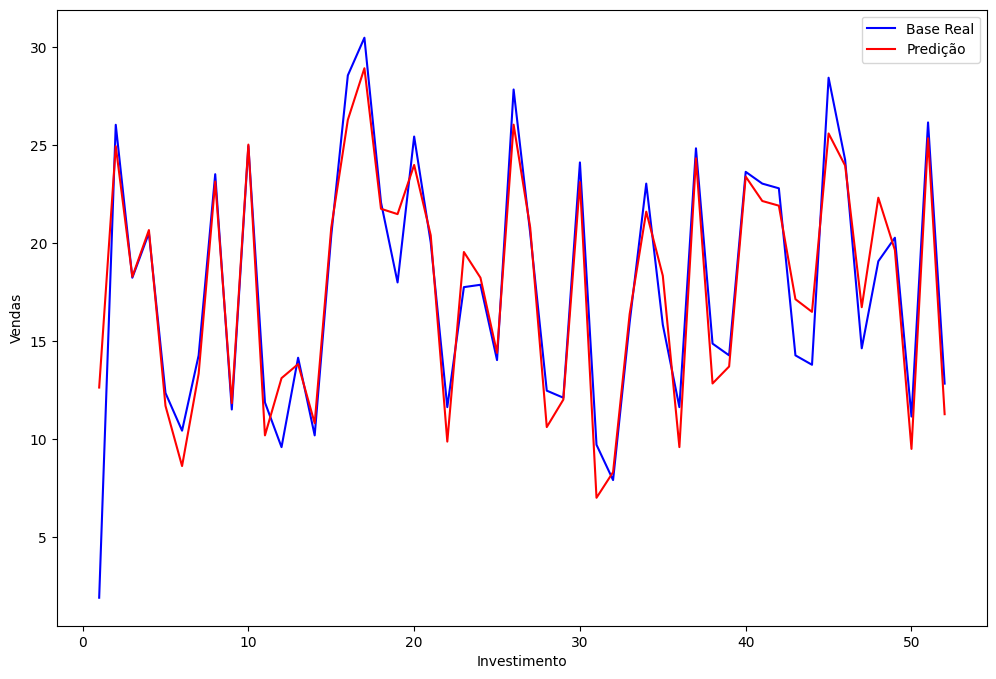

In [127]:
c = [i for i in range(1,53,1)]
fig = plt.figure(figsize=(12,8))
plt.plot(c, y_test, color='blue', label="Base Real")
plt.plot(c,y_pred, color='red', label="Predição")
plt.xlabel('Investimento')
plt.ylabel('Vendas')
plt.legend()
plt.show()


# **Calculando Predição**

In [135]:
#Na predição abaixo, utilizei os valores reais para demonstrar o quão alto investimos no Youtube e o quão baixo foi o retorno.

youtube = 351.48
facebook = 33.96
newspaper = 51.84

investimento = [[youtube, facebook, newspaper]]

ln.predict(investimento)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([25.93902766])

In [136]:
#Utilizei os mesmos valores e mudei o foco do investimento para a plataforma newspaper. Os valores de venda diminuiram mais ainda.

youtube = 51.84
facebook = 33.96
newspaper = 351.48

investimento = [[youtube, facebook, newspaper]]

ln.predict(investimento)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([12.34906273])

In [137]:
#Utilizei os mesmos valores e coloquei o foco principal no Facebook. O valor das vendas aumentou em mais de 300%!

youtube = 51.84
facebook = 351.48
newspaper = 33.96

investimento = [[youtube, facebook, newspaper]]

ln.predict(investimento)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([72.10581118])

# **Conclusão**

Após as análises e predições feitas, chega-se a conclusão de que o baixo retorno de vendas para os investimentos em publicidade inicial se deu principalmente pelo alto investimento errôneo na plataforma do Youtube, que se mostra não ser a principal fonte de venda.
As predições nos mostram que se invertermos os investimentos do Youtube com o Facebook teremos mais de 300% de aumento no nosso valor de vendas, acredito que traria uma benefício enorme para a empresa.